# Part B Q1

### Random Forest on Iris dataset 

In [2]:
import pandas as pd
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
from sklearn.model_selection import train_test_split
# x will be features 
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  
y=data['species']  # y response will be species 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [8]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
species_idx = clf.predict([[3, 5, 4, 2]])[0]
iris.target_names[species_idx]

Accuracy: 0.9333333333333333


C:\Users\dbda-lab\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'virginica'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


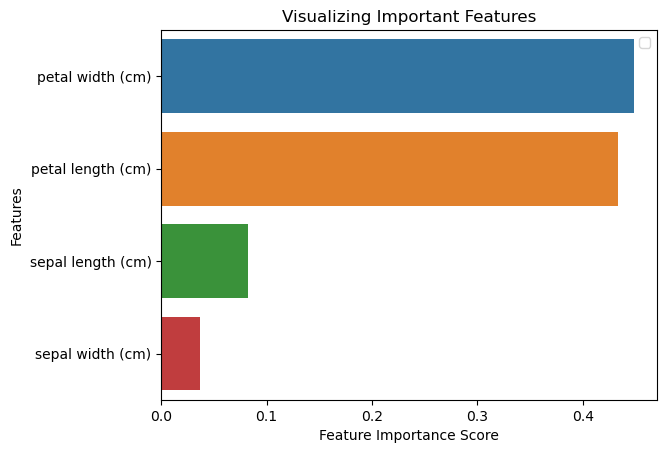

In [11]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [15]:
# Importing train_test_split function
from sklearn.model_selection import train_test_split

# Removing feature "sepal length"
X=data[['petal length', 'petal width','sepal length']]  
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


# Part B Q2 

In [16]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
import matplotlib.pyplot as plt


dataset=np.array([['Asset Flip',100,1000],
                  ['Text Based',500,3000],
                  ['Visual Novel',1500,5000],
                  ['2D Pixel Art',3500,8000],
                  ['2D Vector Art',5000,6500],
                  ['Strategy',6000,7000],
                  ['First Person Shooter',8000,15000],
                  ['Simulator',9500,20000],
                  ['Racing',12000,21000],
                  ['RPG',14000,25000],
                  ['Sandbox',15500,27000],
                  ['Open-World',16500,30000],
                  ['MMOFPS',25000,52000],
                  ['MMORPG',30000,80000]])

In [17]:
X = dataset[:, 1:2].astype(int) 
y = dataset[:, 2].astype(int) 

In [18]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X, y)

y_pred = regressor.predict([[3750]])

In [19]:
print("Predicted price: % d\n"% y_pred) 

X_grid = np.arange(min(X), max(X), 0.01)

X_grid = X_grid.reshape((len(X_grid), 1)) 

Predicted price:  8000



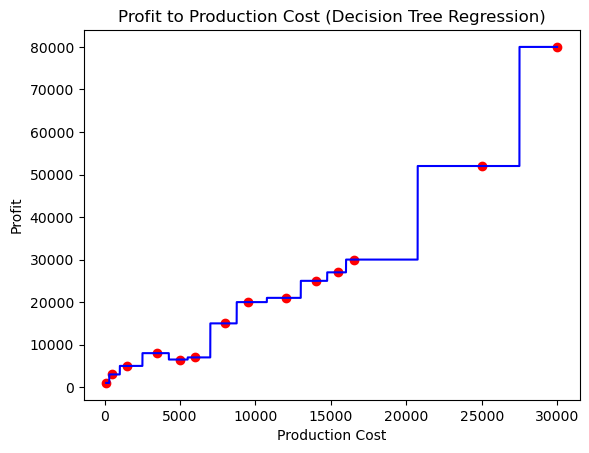

In [20]:
plt.scatter(X, y, color = 'red')

plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 

plt.title('Profit to Production Cost (Decision Tree Regression)') 

plt.xlabel('Production Cost')
plt.ylabel('Profit')
plt.show()

#  PART B Q3 Image processing

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import misc
import imageio
import os
os.chdir(r'C:\Users\dbda-lab\Desktop\ML Lab Exam')

In [22]:
def read_image():
      
    # loading the png image as a 3d matrix 
    img = imageio.imread(r'C:\Users\dbda-lab\Desktop\ML Lab Exam\bird_image.png') 
  
    # uncomment the below code to view the loaded image
    # plt.imshow(A) # plotting the image. -what is A over here?
    # plt.show() 
      
    # scaling it so that the values are small
    img = img / 255 
  
    return img

In [23]:
def initialize_means(img, clusters):
      
    # reshaping it or flattening it into a 2d matrix
    points = np.reshape(img, (img.shape[0] * img.shape[1],
                                             img.shape[2])) 
    m, n = points.shape
  
    # clusters is the number of clusters
    # or the number of colors that we choose.
      
    # means is the array of assumed means or centroids. 
    means = np.zeros((clusters, n)) 
  
    # random initialization of means. 
    for i in range(clusters):
        rand1 = int(np.random.random(1)*10)
        rand2 = int(np.random.random(1)*8)
        means[i, 0] = points[rand1, 0]
        means[i, 1] = points[rand2, 1]
  
    return points, means

In [24]:
def distance(x1, y1, x2, y2):
      
    dist = np.square(x1 - x2) + np.square(y1 - y2)
    dist = np.sqrt(dist)
  
    return dist

In [25]:
def k_means(points, means, clusters):
  
    iterations = 10 # the number of iterations 
    m, n = points.shape
      
    # these are the index values that
    # correspond to the cluster to
    # which each pixel belongs to.
    index = np.zeros(m) 
  
    # k-means algorithm.
    while(iterations > 0):
  
        for j in range(len(points)):
              
            # initialize minimum value to a large value
            minv = 1000
            temp = None
              
            for k in range(clusters):
                  
                x1 = points[j, 0]
                y1 = points[j, 1]
                x2 = means[k, 0]
                y2 = means[k, 1]
                  
                if(distance(x1, y1, x2, y2) < minv):         
                    minv = distance(x1, y1, x2, y2)
                    temp = k
                    index[j] = k 
          
        for k in range(clusters):
              
            sumx = 0
            sumy = 0
            count = 0
              
            for j in range(len(points)):
                  
                if(index[j] == k):
                    sumx += points[j, 0]
                    sumy += points[j, 1] 
                    count += 1
              
            if(count == 0):
                count = 1    
              
            means[k, 0] = float(sumx / count)
            means[k, 1] = float(sumy / count)     
              
        iterations -= 1
  
    return means, index

In [26]:
def compress_image(means, index, img):
  
    # recovering the compressed image by
    # assigning each pixel to its corresponding centroid.
    centroid = np.array(means)
    recovered = centroid[index.astype(int), :]
      
    # getting back the 3d matrix (row, col, rgb(3))
    recovered = np.reshape(recovered, (img.shape[0], img.shape[1],
                                                     img.shape[2]))
  
    # plotting the compressed image.
    plt.imshow(recovered)
    plt.show()
  
    # saving the compressed image.
    misc.imsave('compressed_' + str(clusters) +
                        '_colors.png', recovered)

In [ ]:
# Driver Code
if __name__ == '__main__':
  
    img = read_image()
  
    clusters = 16
    clusters = int(input('Enter the number of colors in the compressed image. default = 16\n'))
  
    points, means = initialize_means(img, clusters)
    means, index = k_means(points, means, clusters)
    compress_image(means, index, img)